### RESULTS:
Classfication task (Classes = 1 and 2)

Number of features=501 , Number of rows= 2600

No missing or zero or NULL values --Data Preprocessing not required

Colinearity present in the data

Next Step: **Is the data linearly separable?** (Can't check with matplotlib since the dimensions are too many) One practice is to train perceptron classifier on the dataset and see if it gives 100% accuracy or not. This works since perceptron is mathematically proven method which is able to divide data correctly unless it is nonlinear.
After we figure out if it's linearly separable or not (most likely it isn't), we will pick a Classifier algorithm to classify this data.

In [1]:
'''Load and quick check the data'''
import pandas as pd
df= pd.read_csv("medilon.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,2
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,2
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,2
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [2]:
'''View description of data'''
df.info()

'''View dimension of data'''
print("\nNo. of Samples: %d" % df.shape[0])
print("No. of Features: %d" % df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, V1 to Class
dtypes: int64(501)
memory usage: 9.9 MB

No. of Samples: 2600
No. of Features: 501


In [3]:
'''View summary of the data'''
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V492,V493,V494,V495,V496,V497,V498,V499,V500,Class
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077,1.500000
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791,0.500096
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000,1.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000,1.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000,1.500000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000,2.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000,2.000000


In [4]:
'''Check for NULL values'''
result=df.isnull().any().any() #Check for any null values in any column

if result:
    print("NULL values present")
else:
    print("No NULL values")

No NULL values


In [5]:
'''Check for 0 in target column'''
count = 0

def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

count = zeroCount(df, 'Class')

print("Number of 0s in the Target Column: %d" % count)

Number of 0s in the Target Column: 0


Class distribution: 1    1300
2    1300
Name: Class, dtype: int64


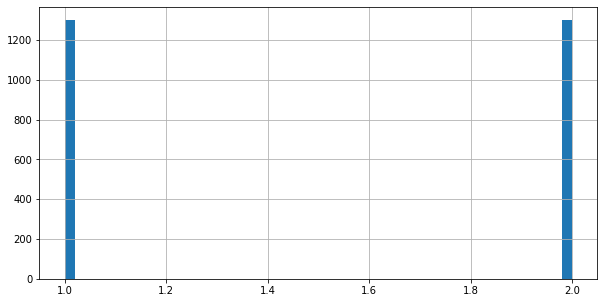

In [6]:
'''Visualize target column'''
import matplotlib.pyplot as plt
%matplotlib inline

print("Class distribution:", df['Class'].value_counts())
df['Class'].hist(bins=50, figsize=(10,5)) 

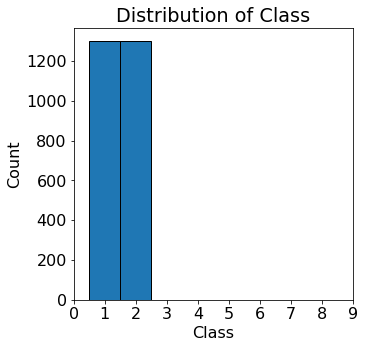

In [7]:
'''Visualize distribution of class'''
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (5, 5)

# Bar plot of grades
plt.bar(df['Class'].value_counts().index, 
        df['Class'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Class'); 
plt.ylabel('Count'); 
plt.title('Distribution of Class');
plt.xticks(list(range(0, 10)));

In [8]:
'''View Corelations with target column'''
df.corr()['Class'].sort_values(ascending=False) 
#Compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes

Class    1.000000
V337     0.159557
V65      0.158897
V339     0.129799
V443     0.107368
           ...   
V49     -0.106511
V106    -0.121229
V129    -0.124895
V242    -0.224787
V476    -0.225468
Name: Class, Length: 501, dtype: float64

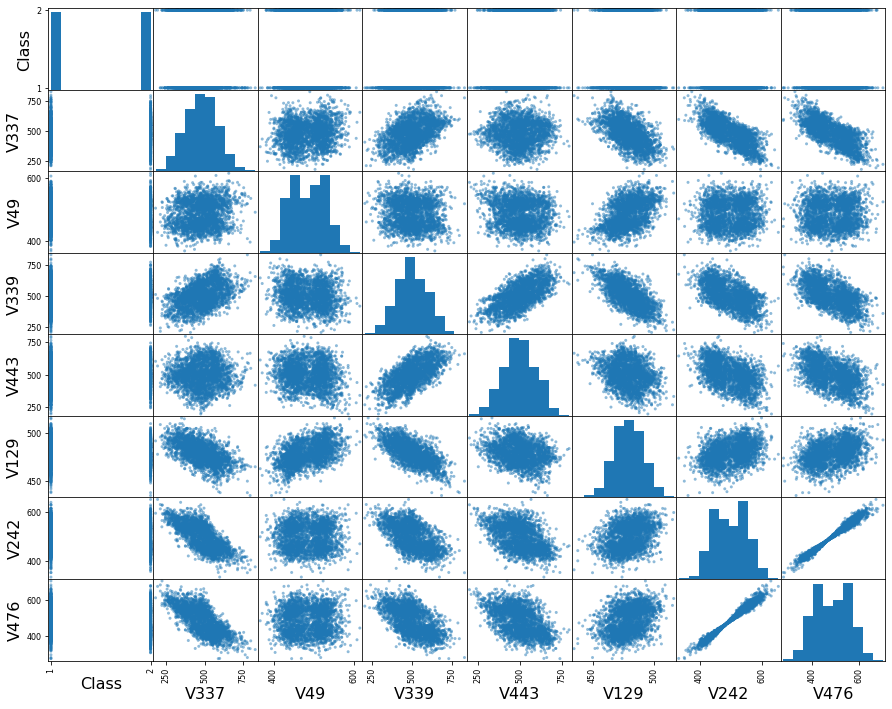

In [10]:
'''Visualize the most promising corelations with Scatter matrix'''
from pandas.plotting import scatter_matrix

attributes = ["Class", "V337", "V49", "V339", "V443", "V129","V242", "V476"]
scatter_matrix(df[attributes], figsize=(15, 12));

In [85]:
'''Check for colinearity'''
df_cor = df.corr()
cor= df.corr().values
for ci in range(0, cor.shape[1]):
    for ri in range(0,cor.shape[0] ):
        if(cor[ri, ci]>0.9 and ri!=ci): #Threshold for colinearity = 0.9
            print("Colinear columns:", df_cor.columns[ci], df_cor.columns[ri])

Colinear columns: V29 V319
Colinear columns: V29 V452
Colinear columns: V49 V379
Colinear columns: V65 V337
Colinear columns: V106 V129
Colinear columns: V129 V106
Colinear columns: V154 V282
Colinear columns: V154 V434
Colinear columns: V242 V476
Colinear columns: V282 V154
Colinear columns: V282 V434
Colinear columns: V319 V29
Colinear columns: V319 V452
Colinear columns: V337 V65
Colinear columns: V379 V49
Colinear columns: V434 V154
Colinear columns: V434 V282
Colinear columns: V443 V473
Colinear columns: V452 V29
Colinear columns: V452 V319
Colinear columns: V454 V494
Colinear columns: V473 V443
Colinear columns: V476 V242
Colinear columns: V494 V454


In [ ]:
correlation = df.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

### Conclusions:
1. Classfication task (Classes = 1 and 2)
2. Number of features=501 , Number of rows= 2600
3. No missing or zero or NULL values --Data Preprocessing not required
4. Colinearity present in the data
5. Is the data linearly separable? (Can't check with matplotlib since the dimensions are too many)
One practice is to train perceptron  classifier on the dataset and see if it gives 100% accuracy or not.  This works since perceptron is mathematically proven method which is able to divide data correctly unless it is nonlinear. 
6. After we figure out if it's linearly separable or not (most likely it isn't), we will pick a Classifier algorithm to classify this data.